# Assignment #4 - Neural Networks

### <font color="red"> DUE: Oct 29 (Tuesday) 11:00 pm </font>  

<font color="blue"> Siddhi Degaonkar </font>

# I. Overview

**Objective and approach**
The Objective of Assignment#3 is to 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies. Then use those good parameters for training neural networks. I have to use NeuralNet class on Diamond regression dataset. 
Then I have summarized  the nonlinear logistic regression model and finished the NeuralNetLogReg class.
Applied the code with toy synthetic data and Bank-Marketing Classification Dataset.

**Scope of Assignment**
Assignment # 3 consist of:

1. Introduction to Regression Data
2. 5-fold Cross Validation
3. Results of Cross Validation
4. Nonlinear Regression
5. Nonlinear Logistic Regression


**Conclusion** is derived and **references** are presented.


# II. Data

# Regression Data

* This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

* Attributes if Dataset

1. Carat : Carat weight of the Diamond.(0.2--5.01)
2. Cut : Describe cut quality of the diamond.  Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
3. Color : Color of the Diamond.
   With D being the best and J the worst.
4. Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
   (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1,      I2, I3
5. Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
6. Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
7. Price : the Price of the Diamond. Price in US dollars (\$326--\$18,823)
8.  X : Length of the Diamond in mm.(0--10.74)
9. Y : Width of the Diamond in mm.(0--58.9)
10. Z : Height of the Diamond in mm.(0--31.8)

* Depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* Table width of top of diamond relative to widest point (43--95)

* Qualitative Features (Categorical) : Cut, Color, Clarity.

* Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.

* Price is the **Target Variable**.

**Source: Kaggle**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# Disable Warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=SyntaxWarning)
warnings.simplefilter(action='ignore', category=Warning)

df = pd.read_csv('diamonds.csv')
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [2]:
print(df.shape)

(53940, 11)


In [3]:
print("MATCH dataset consists of total {rows} rows.".format(rows = len(df)))

MATCH dataset consists of total 53940 rows.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**DATA PREPROCESSING**

In [5]:
#Calculate percentage of missing values for each column
missing_values = df.isnull().mean()
missing_values.sum()

0.0

* Dataset has **NO** missing values.

* Dropping the Unnamed column 

In [6]:
df = pd.read_csv('diamonds.csv', index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


**DATA VISUALIZATION AND PREPROCESSING FOR DIAMOND DATASET**

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* The minimum values for x,y and z shown are 0 but it is not possible because the length, width and depth cannot be zero. 

In [8]:
print("No. of rows with x == 0: {} ".format((df.x==0).sum()))
print("No. of rows with y == 0: {} ".format((df.y==0).sum()))
print("No. of rows with z == 0: {} ".format((df.z==0).sum()))


No. of rows with x == 0: 8 
No. of rows with y == 0: 7 
No. of rows with z == 0: 20 


* To eliminate the 0 in dimensions we use dropna method

In [9]:
df.dropna(inplace=True)
df.shape

(53940, 10)

In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
volume = df['x']*df['y']*df['z']
df = df.assign(volume = df['x']*df['y']*df['z'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [12]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
volume     28465
dtype: int64

**DATA PLOTS FOR UNDERSTANDING**

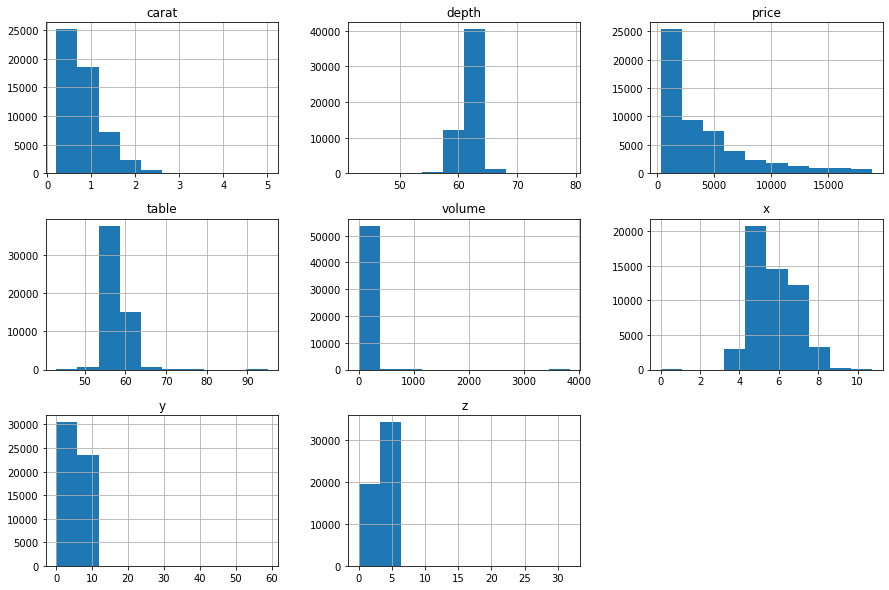

In [13]:
h = df.hist(figsize=(15,10))

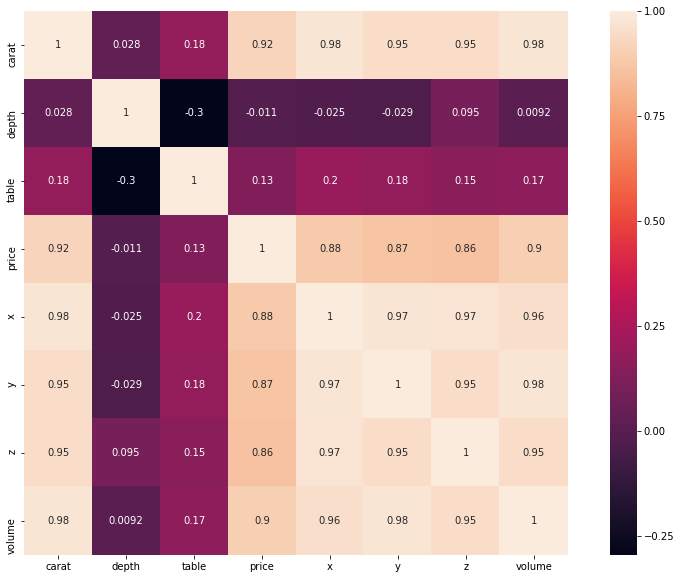

In [14]:
plt.figure(figsize=(15, 10))
corr_map = df.corr()
sns.heatmap(data=corr_map, square=True , annot=True, cbar=True)

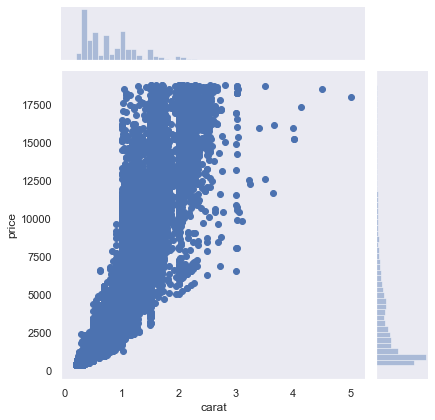

In [15]:
sns.set(style="dark", color_codes= False)
g = sns.jointplot(y="price", x="carat", data=df)

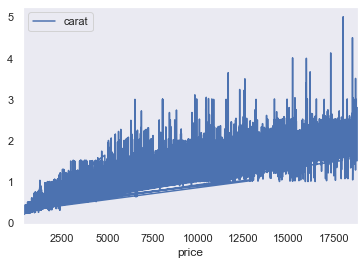

In [16]:
df.plot(x='price', y='carat')

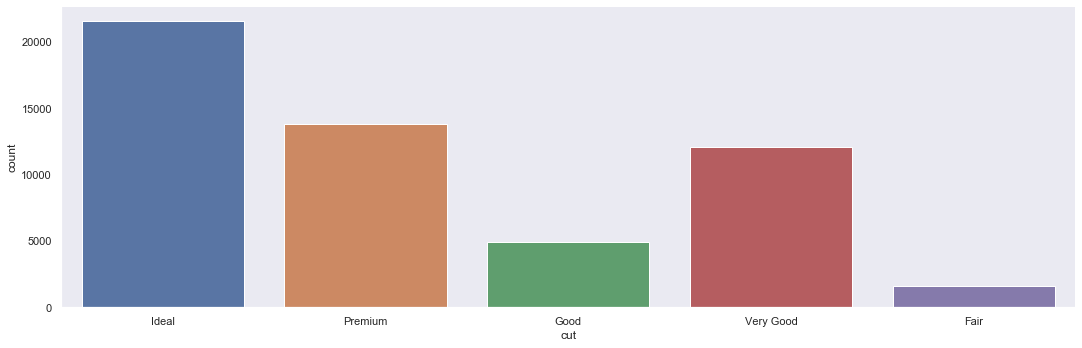

In [17]:
p = sns.factorplot(x='cut', data=df , kind='count',aspect=3 )

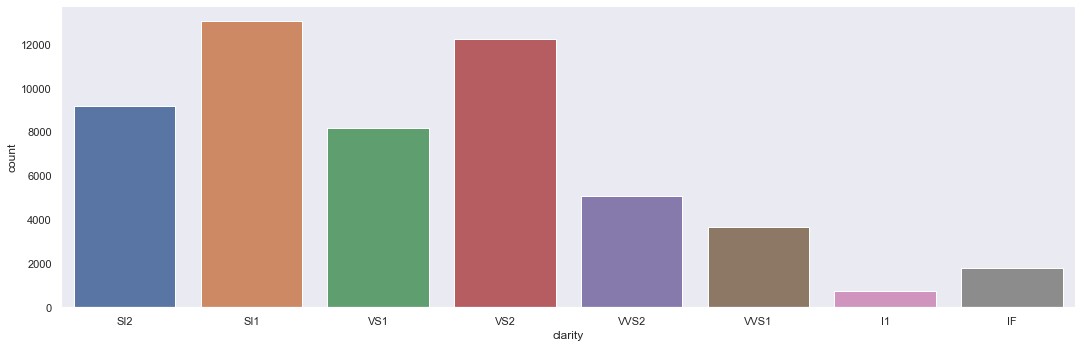

In [18]:
p = sns.factorplot(x='clarity', data=df , kind='count',aspect=3)

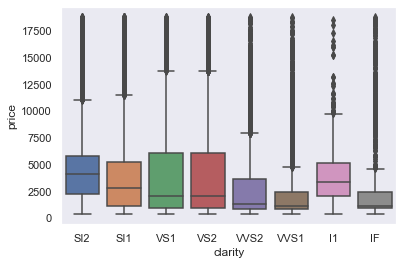

In [19]:
sns.boxplot(x='clarity', y='price', data=df )

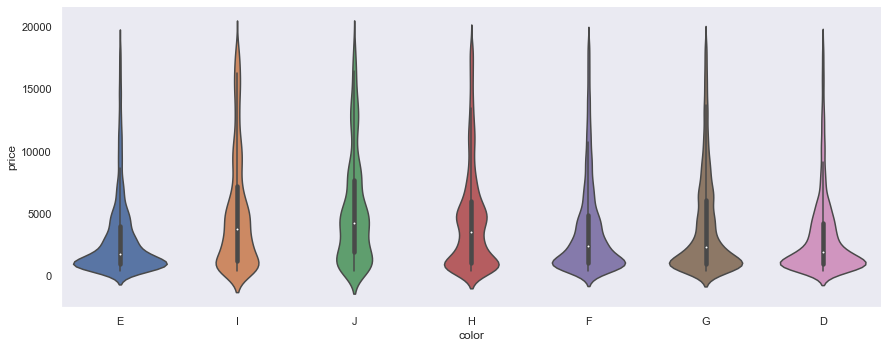

In [20]:
sns.factorplot(x='color', y='price' , data=df , kind='violin', aspect=2.5)

**DATA - PRELIMINARY OBSERVATIONS**
From the **Correlation Matrix** following conclusions are derived:
1. Carat value is highly related to the Price of Diamond.
2. Depth is inversely related to the price of Diamond.
3. The Weight (Carat) of a diamond has the most significant impact on its Price. As the weight increases the price also increases.
4. The Length=x ,Width=y and Height=z seems to be highly related to Price and even each other.

* The Price and Carat show a linear relationship.
* Ideal Cut quality of Diamond has the highest count among all.
* VS1 and VS2 affect the Diamond's Price equally having quite high Price margin.
* Price of J Color Diamond is highest.

In [21]:
df_r = df

# III. Methods
#### Summary of Neural Networks
Feed forward neural networks have a rich representation. Thus, it can represent the linear model with single layer. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/mlp_linear.png" width=400/>

Considering the multiple outputs, we formulated this in matrix: 

$$
\begin{align}
E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2 \\
\\
Ym &= Xlm \cdot Wm
\end{align}
$$

Here, we assume the first column of $Xlm$ is the bias column with 1's.  
Thus, the weight matrix $Wm$ is $(D+1) times K$ with the bias row in the first row.   

From this model, we can convert the raw data $Xm$ to $Phiv$, which is a nonlinear mapping.

$$
phi: Xm \rightarrow Phi
$$

Then, we can rewrite the linear model with as follows:

$$
\begin{align}
E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2 
\\
Ym &= Phiv Wm \\ 
\\
Ym_{nk} &= Phiv_n^\top Wm_k 
\end{align}
$$

Now, let $phi(xv) = h(xv)$ where $h$ is the *activation function*.  

$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm 
\end{align}
$$

Figure below depics this model. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/nn.png" width=500/>

The size of each matrix is listed: 
- $Xm: N \times D$
- $Xlm: N \times (D+1)$
- $Vm: (D+1) \times G$
- $Zm: N \times G$
- $Zlm: N \times (G+1)$
- $Wm: (G+1) \times K$
- $Ym: N \times K$

For this two-layer network, we call the blue circle layer with the activation functions as **hidden layer** and the organge layer with summation as **output layer**.
#### Summarize the nonlinear classification model. 
Previously, we learned the linear logistic regression that uses the softmax layer for classification along with a linear model. 

$$
g_k(xv) = P(T=k \mid xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
wv \leftarrow wv + \alpha Xm^\top \Big(  Tm - g(Xm)\Big).
$$

Remember we start from the error function below for the derivation bvefore:

$$
E(wv) = - \ln P(Tm \mid wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/linearlogreg.png" width=450 />


## III.A 5-fold Cross Validation


### Summary of CV and Correctness of Implementation

- In Cross Validation we divide the data into 5 equal parts since we are using 5-fold Cross validation.We use 4 parts for training and 1 part for Validation. Using each set as Test Set at a time and the rest as Validation and Train Set it will try to find the best model depending on the accuracies of each model. 
- The hyper-parameters of the model with the lowest error rate on Validation Set are selected and trained again and applied on the Test Set. Using this we find the best parameter list and then apply it on NeuralNet Class.

### Implementation:

- The following explanation is adopted from the below procedure as given in the class note.
>  Choose K for K-fold cross validation.

>  Set nfold = 0. 

>  Initialize the lists *res* = [], *testErrs* = [].

>  Split data X and label T into K number of partitions.

>  For each TEST partition 

>>  For each validation partition among the rest partitions 

>>>  Choose the rest partitions into a training set.

>>>  For each set __P__ of parameters to test

>>>>   Using __P__, train the model 

>>>>   Use the trained model on the validation data

>>>>   Evaluate the validation result and store the restuls to *res*

>>  From the *res* result, pick the one with the best result.

>>  Retrain the model with the best parameter __p__ in __P__.

>>  Apply the model with the best parameter __p*__ to the test dataset. 

>>  Evaluate the result *err* and store the tuple (__p*__, *err*) to *testErrs*. 

>  Return *testErrs*. 

* The function KFolds() partitions the data into k-folds.(here k is 5).
* Then one fold is set aside for testing, leaving rest of the four sets for training and validation.
* In cross_validate() the feature's set and the target labels are sent as input parameters, after selecting one as a validation set from the remaining, the left three folds are used  for training. 
* While selecting the hyper parameters we do the combination of selecting one  at a time, training the model and then validating against the Validation set, finding its error rate.
- After all the four validation sets are applied to the model, minimum error rate is selected from the set and the hyper parameters that gave this accuracy is used again to train the model and it is applied to the test set and its accuracies are then stored in a bestaccuracies list as a tuple of the hyperparameter and its corresponding error. 

## Cross Validation

In [22]:
data = df_r.sample(15000)

In [23]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
39423,0.41,Ideal,F,VS1,61.8,56.0,1076,4.79,4.75,2.95,67.119875
39146,0.41,Ideal,G,VS2,62.5,56.0,1061,4.75,4.72,2.96,66.363200
23457,1.53,Very Good,H,VS2,60.9,63.0,11452,7.37,7.41,4.50,245.752650
7822,1.00,Very Good,D,SI2,63.3,60.0,4295,6.29,6.19,3.95,153.793645
53196,0.70,Ideal,G,VS2,60.0,57.0,2633,5.80,5.84,3.49,118.213280


In [24]:
X=data.loc[:,["carat","depth","price","x","y","z"]].values
mux = np.mean(X,0)  
sigmax = np.std(X,0)
X= (X - mux) / sigmax 
X.shape

(15000, 6)

In [25]:
T=data.loc[:,["price"]]
mu = np.mean(T,0)  
sigma = np.std(T,0)
T = (T - mu) / sigma 
T= T.values.reshape(T.shape[0],1)
T.shape

(15000, 1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.2, random_state=0)

In [27]:
from sklearn.metrics import mean_squared_error
from nn import NeuralNet

In [28]:
def get_k_folds(data):
    fold_part = len(data) / 5.0
    total_list = []
    x = 0.0
    while x < len(data):
        total_list.append(data[int(x):int(x + fold_part)])
        x += fold_part
    return total_list

In [29]:
best_paramlist = []
final_list = []

In [30]:
def cross_validate(X, y, parameters):
    X_partitioned = get_k_folds(X)
    y_partitioned = get_k_folds(y)
    
    for i in range(5): 
        X_test = X_partitioned[i]
        y_test = y_partitioned[i]

        total_rmse = []
        params = [] 
        
        for k in range(5):
            if i == k: 
                continue 
            
            X_val = X_partitioned[k]
            y_val = y_partitioned[k]
            
            X_train = X_partitioned[not i and not k]
            y_train = y_partitioned[not i and not k]
            
            paramlist = []
            rmselist = []
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, y_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(y_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            total_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        best_param = paramlist[np.argmin(total_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        y_train = y_partitioned[not i]
        best_model.train(X_train, y_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(y_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list, best_paramlist

In [31]:
models = [[6,3,1],[6,5,1],[6,7,1], [6,10,1], [6,12,1]]
bestAccuracy,bestParam = cross_validate(np.array(X), np.array(T), models)

In [32]:
print(bestAccuracy,bestParam)

[0.004971772328953926, 0.002471793776092538, 0.0019975558819681732, 0.00488920073380127, 0.034901495158173486] [[6, 5, 1], [6, 3, 1], [6, 3, 1], [6, 5, 1], [6, 5, 1]]


## III.B Nonlinear Regression 

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes (not in comment). 

### Summarize the nonlinear regression model

* Nonlinear regression is a form of regression analysis in which data is fit to a model and then expressed as a mathematical function. Simple linear regression relates two variables (X and Y) with a straight line (y = mx + b), while nonlinear regression must generate a line (typically a curve) as if every value of Y was a random variable. The goal of the model is to make the sum of the squares as small as possible. 
* The sum of squares is a measure that tracks how much observations vary from the mean of the data set. It is computed by first finding the difference between the mean and every point of data in the set. Then, each of those differences is squared. Lastly, all of the squared figures are added together. The smaller the sum of these squared figures, the better the function fits the data points in the set. Nonlinear regression uses logarithmic functions, trigonometric functions, exponential functions, and other fitting methods.
* Nonlinear regression modeling is similar to linear regression modeling in that both seek to track a particular response from a set of variables graphically. Nonlinear models are more complicated than linear models to develop because the function is created through a series of approximations (iterations) that may stem from trial-and-error. Mathematicians use several established methods, such as the Gauss-Newton method and the Levenberg-Marquardt method.

* Below I have called the NeuralNet Class from nn on the best parameters selected from Cross Validation.

In [33]:
neural_net = NeuralNet([6,3,1]) 
neural_net.train(X_train, y_train, niter=1000)

{'w': array([ 7.71113792e-02, -2.76148145e-01,  2.67941451e-01, -1.12935418e+00,
        -7.33150284e-03, -1.22203478e+00,  9.04957480e-02,  3.55969626e-04,
         1.13324612e-01, -1.51573840e+00,  1.79808715e-01, -1.25796279e+00,
        -1.05950329e+00,  8.79217796e-03, -1.27983806e+00, -1.07068439e+00,
         5.09148388e-06, -1.19596456e+00, -9.49477468e-01,  1.44271481e-03,
        -1.18705633e+00,  1.50369298e+00, -2.44123745e-01,  5.69401906e+00,
         2.24783738e-01]),
 'f': 4.533057354135133e-05,
 'reason': 'reached limit of nIterations',
 'wtrace': None,
 'ftrace': None}

### Explanation of Code

#### NeuralNet class

__init__ function: It inherits the same initialization class as NeuralNet
 
forward() : It inherits the same initialization class. 

object_f() : It calculates the error by the log function. It also takes care of the the Y not being 0 by adding a small possible value(epsilon) to it because log of 0 is not defined.

train() : It pre-processes the inputs and then trains it. This function is recursive function which calls itself. The target data that is being passed to this function is an indicator matrix which represents of the classes of the data in separate columns.

use : applies the trained network to predict

## III.C Nonlinear Logistic Regression

- Summarize the nonlinear logistic regression model. 
- Finish the following NeuralNetLogReg class.
- Check if your codes works well with toy synthetic data. 
- Apply to your classification data. 
- Explain your codes (not in comment). 

**Summarize the nonlinear logistic regression model.**

The linear logistic regression that uses the softmax layer for classification along with a linear model. 

$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
w_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$

Remember we start from the error function below for the derivation bvefore:

$$
E(w) = - \ln P(T \mid w) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$


#### Summary (Regression vs Classification)


<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm \\
Gm & = softmax(Ym)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
Vm &leftarrow Vm + \alpha_h \frac{1}{N} \frac{1}{K} Xlm^\top \Big( (Tm - Ym) Wm^\top \odot (1 - Zm^2) \Big) \\
Wm &leftarrow Wm + \alpha_o \frac{1}{N} \frac{1}{K} Zlm^\top \Big( Tm - Ym \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h Xlm^\top \Big( (Tm - Gm) Wm^\top \odot (1 - Zm^2) \Big)\\
Wm &\leftarrow Wm + \alpha_o Zlm^\top \Big(  Tm - Gm\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>
Note: Here $Tm$ is a matrix with indicator variable outputs, <br/>
and $Gm$ is the output matrix after the softmax layer.</td>
</tr>
</table> 

In [34]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self,nunits)

   
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f)) 
    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t,z = NeuralNet.forward(self,X)
        return self.softmax(t),z

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        epsilon=1e-12
        Y = np.clip(Y, epsilon, 1. - epsilon)
        N = Y.shape[0]
        ce = -np.sum(np.sum(T*np.log(Y+1e-9)))
        return ce

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        NeuralNet.train(self,X,T)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Xs = X
        classes, probabilities = self.forward(Xs)
        if self.stdT is None:
            classes = self.stdT.unstandardize(classes)
        return classes,np.argmax(classes,1) 


In [35]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from grad import scg

In [37]:
x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
X1 = np.hstack((np.ones((X.shape[0], 1)), X))

In [38]:
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

Text(0.5, 1.0, 'training data set')

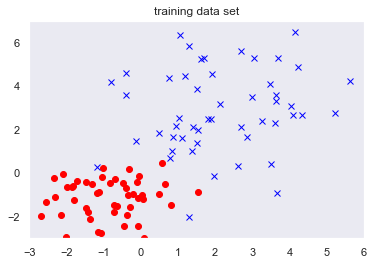

In [39]:
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

In [40]:
Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

In [41]:
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

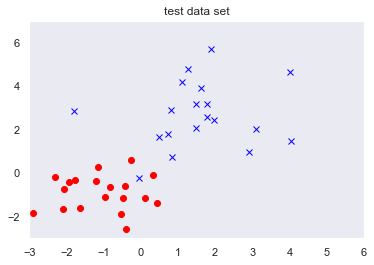

In [42]:
Xtests = (Xtrain - means) / stds

plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')
plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")
plt.show() 
net = NeuralNetLogReg([2,6,2])
for i in range(5):
    net.train(Xtrain,Ttrain)

In [43]:
classes,z = net.use(Xtest)

In [44]:
# show me the boundary
x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)
xs, ys = np.meshgrid(x, y)
X = np.vstack((xs.flat, ys.flat)).T
X1 = np.hstack((np.ones((X.shape[0], 1)), X))
classes,z= net.use(X)

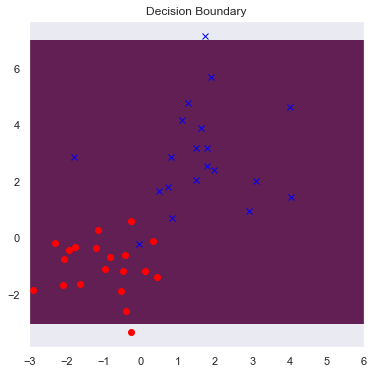

In [45]:
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, z.reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')
plt.show()

In [46]:
df2  = pd.read_csv('bank.csv')

In [47]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [48]:
df2 = df2.drop(columns=['default', 'loan','contact','poutcome','job','previous','pdays'])

In [49]:
encoding_dict = {"marital" : {"single":1 , "married":2 , "divorced":3},
                 "housing" : {"no": -1 , "yes": 1},
                 "month" : {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                 "deposit": {"no":0,"yes":1},
                 "education" :{"unknown":0,"primary":1,"secondary":2,"tertiary":3}
                }
df2.replace(encoding_dict, inplace = True)
df2.head()
df2.shape

(11162, 10)

In [50]:
def normalize(X):
    return (X/X.max())

In [51]:
"""df2["month"] = normalize(df2["month"])
df2["duration"] = normalize(df2["duration"])
df2["campaign"] = normalize(df2["campaign"])
df2["day"] = normalize(df2["day"])
df2["age"] = normalize(df2["age"])
df2["marital"] = normalize(df2["marital"])
df2["education"] = normalize(df2["education"])
df2["balance"] = normalize(df2["balance"])
df2["housing"] = normalize(df2["housing"])
df2.head()
df2.shape"""

'df2["month"] = normalize(df2["month"])\ndf2["duration"] = normalize(df2["duration"])\ndf2["campaign"] = normalize(df2["campaign"])\ndf2["day"] = normalize(df2["day"])\ndf2["age"] = normalize(df2["age"])\ndf2["marital"] = normalize(df2["marital"])\ndf2["education"] = normalize(df2["education"])\ndf2["balance"] = normalize(df2["balance"])\ndf2["housing"] = normalize(df2["housing"])\ndf2.head()\ndf2.shape'

In [52]:
data = df2.sample(10000)

In [53]:
data.head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
97,41,2,2,501,1,19,5,579,5,1
5656,34,2,2,79,1,23,5,83,1,0
2813,60,2,2,10925,-1,23,10,270,3,1
9917,36,2,2,4613,-1,2,4,320,1,0
605,38,3,2,1817,1,28,7,1096,4,1


In [54]:
X=data.iloc[:,0:-1]
X = X.as_matrix()
X.shape

(10000, 9)

In [55]:
T=data.iloc[:,-1]
T = T.as_matrix()
T = T.reshape(T.shape[0],1)
T.shape

(10000, 1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(T_train.shape)
print(T_test.shape)

(8000, 9)
(2000, 9)
(8000, 1)
(2000, 1)


In [58]:
T = add_ones(np.array(T_train).reshape(-1,1))
(T[:,0])[T[:,1]==1] = 0
print(T.shape)

(8000, 2)


In [59]:
obj_log = NeuralNetLogReg([9, 4, 2])
obj_log.train(X_train, T_train)
Classes,Z = obj_log.use(X_test[0:400])

In [60]:
print(Classes)

[[9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.99992459e-01 7.54139639e-06]
 [9.999924

In [61]:
print(Z)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


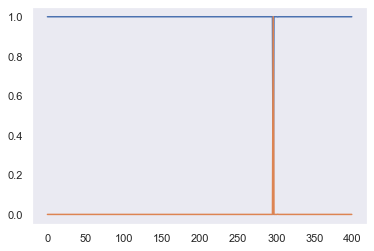

In [62]:
plt.plot(Classes)
plt.show()

Accuracy:  53.33325 %


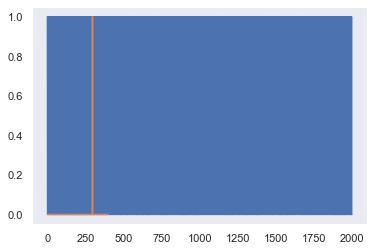

In [63]:
plt.plot(T_test)
plt.plot(Z)
print("Accuracy: ", 100 - np.mean(np.abs(T_test - Z)) * 100, "%")

Text(0.5, 1.0, 'Decision Boundary')

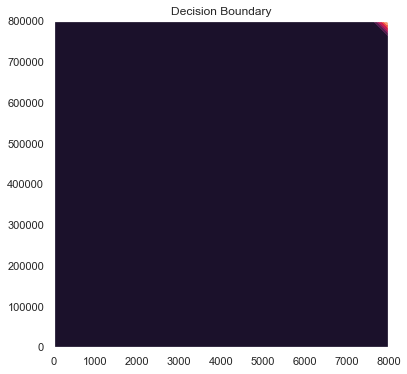

In [64]:
xs, ys = np.meshgrid(np.linspace(0,8000, 20), np.linspace(-1,800000, 20))
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort(Z>0).reshape(xs.shape)))
plt.title("Decision Boundary")

#### Explanation of code Nonlinear Logistic regression 

# Neural Net Logistic Regression Class

Standardizer is a class that normalizes the numeric values of the dataset.
Importing the NeuralNet class will basically import the major functions to be used. The addition will be the non-linearity at the end of the neural network.

init () : This function inherits the same initialization class as NeuralNet
 
forward() : It inherits the same initialization class.

softmax : returns the probability of the classes. It is same as we used for Logistic Regression Assignment 2. 

object_f : It calculates the error by the log function. It also takes care of the the Y not being 0 by adding a small possible() value(epsilon) to it because log of 0 is not defined. This function is used to apply penalty to the model. 

train() : It pre-processes the inputs and then trains it. This function is also recursive function which calls itself. The target data that is being passed to this function is an indicator matrix which represents of the classes of the data in separate columns. This function takes X, T and other parameters as inputs. Uses Standardizer from util file to normalize the input and Target values  if needed.

use() :This function used trained network to predict.

#### Examination of correct implementation 

- The random train and test data is generated with numpy.
- It is normalized with mean and standard deviation.
- A neural network is trained on the same random train data with NeuralNetLogReg with 5 epochs and neurons [9,4,2].
- With use function, prediction is performed on test data.
- The boundary line is also visualized for the test data.

# IV - Results

- Presents the results of comparison of the tested models with CV errors.
- Visualize the results 
- What do you think about the results? 

## Presentation of CV Results

#### Cross validation code for nonlinear logistic regression 

In [65]:
from sklearn.metrics import mean_squared_error
from nn import NeuralNet

In [66]:
def k_split(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

In [67]:
final_list = []
best_paramlist = []

In [68]:
from sklearn.metrics import f1_score

In [69]:
def cross_validate(X, y, parameters):
    
    X_partitioned = k_split(X)
    y_partitioned = k_split(y)
    
    for test in range(5): 
        
        X_test = X_partitioned[test]
        y_test = y_partitioned[test]
        
        j = 0
        
        total_history_rmse = []
        params = []
        
        for val in range(5): 
            
            if test == val: 
                continue
            
            X_val = X_partitioned[val]
            y_val = y_partitioned[val]
            
            X_train = X_partitioned[not test and not val]
            y_train = y_partitioned[not test and not val]
            
            i = 0
            flist = []
            paramlist = []
            
            for param in parameters:
                
                neural_net_lr = NeuralNetLogReg(param)
                neural_net_lr.train(X_train, y_train)
                prob, pred = neural_net_lr.use(X_val)
                y_val1 = y_val[:,0]
                y_val1 = np.where(y_val1 == 0,1,0)
                val_Acc = f1_score(y_val1, pred)
                flist.append(val_Acc)
                paramlist.append(param)
            
            total_history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        
        best_param = params[np.argmax(total_history_rmse)]
        best_model = NeuralNetLogReg(best_param)
        
        X_train = X_partitioned[not test]
        y_train = y_partitioned[not test]
        best_model.train(X_train, y_train)

        prob1, final_pred = best_model.use(X_test)
        
        y_test1 = y_test[:,0]
        y_test1 = np.where(y_test1 == 0,1,0)
        
        score_f1 = f1_score(y_test1, final_pred)
        final_list.append(score_f1)
        best_paramlist.append(best_param)

    return final_list, best_paramlist

## Plots for Result

* 9 input parameters of Bank Data 

In [70]:
models = [[9,3,2],[9,5,2],[9,7,2], [9,10,2], [9,12,2]]
best_accuracy, best_param = cross_validate(np.array(X_train), np.array(T), models)

In [71]:
best_accuracy

[0.6582491582491583,
 0.6550994498518832,
 0.612565445026178,
 0.637062339880444,
 0.0]

In [72]:
print(bestAccuracy,bestParam)

[0.004971772328953926, 0.002471793776092538, 0.0019975558819681732, 0.00488920073380127, 0.034901495158173486] [[6, 5, 1], [6, 3, 1], [6, 3, 1], [6, 5, 1], [6, 5, 1]]


In [73]:
# Selecting the best parameter and applying
obj_log = NeuralNetLogReg([9, 3, 2])
obj_log.train(X_train, T_train)
Z,Classes = obj_log.use(X_test[0:400])

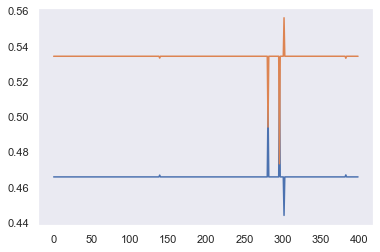

In [74]:
plt.plot(Z)

(2000, 1)
Accuracy for neural network logistic regression:  50.0 %


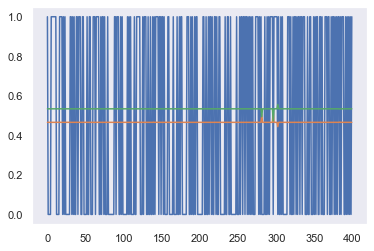

In [75]:
print(T_test.shape)
plt.plot(T_test[0:400])
plt.plot(Z)
print("Accuracy for neural network logistic regression: ", 100 - np.mean(np.abs(T_test[0:400] - Z)) * 100, "%")

Text(0.5, 1.0, 'Decision Boundary')

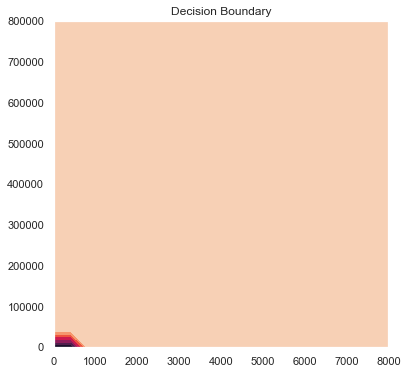

In [76]:
xs, ys = np.meshgrid(np.linspace(0,8000, 20), np.linspace(-1,800000, 20))
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort(Classes>0).reshape(xs.shape)))
plt.title("Decision Boundary")

## Discussions about parameter/network structure choice

This assignment consists of built 5 layer neural network. Input layer has 9 nodes because there are 9 features in my data that are actually useful. Output layer has 2 node. 

I've not only used 5 layers. But I repeated the process with many layers and it was interesting to find that as the layers increase it gives better results and it keeps on improving with more layers. This might not be true because it might lead to over fitting of data. My data is skewed.

I tried for the best network structure by changing the number of nodes in hidden layer. I performed 5 fold cross validation by passing my models variable as[[9,3,2],[9,5,2],[9,7,2], [9,10,2], [9,12,2]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes. 

From the results of cross validation we can see that model [9,3,2] has appeared more number of times.Accuracy is 50%

#### Logistic Regression
- Learning rate: 
    - Depending upon the learning rate, the Logistic Regression Model will perform.
    - If learning rate is too small, then accuracy will be increased but model will take long time to be trained.
    - If the learning rate is high, then the model may overshoot the minimum and will never reach to a good accuracy.
    - There should be a reasonable trade off between the speed of training and accuracy while choosing the learning rate.

#### Non-linear Neural Network
- Network Structure Choice:
    - The descending number of neurons in the structure gives the good accuracy and lesser loss
    - Number of Epochs: As the number of epochs increases, the model is trained more number of times and increases the accuracy of the model. But it also has a trade of that number of Epochs should be such value that it doesn't over fit the model. Currently I am training on 5 epochs.

## Discussion about the prediction results. Try to analyze what nonlinear regression model learned.
- By comparing the accuracy of both the models, it is proven that Non-linear neural network performs better than logistic regression. 
- Logistic regression is not flexible in terms of the parameters to be adjusted. While non-linear neural network's accuracy can be improved by adjusting number of neurons and activation functions. 
- This shows that non-linear Neural Network is having a linear boundary. This shows that non-linear Neural Network gives the better results if the data is not skewed.
- From the accuracy it can be concluded that, non-linear Neural Network works better than Logistic Regression for the classification purpose. 
- Non-linear Neural network has much more flexibility in terms of parameters. Plus, neural network is widely used in the industry for the classification purpose. It can be even used for the multi-class classification. But the sigmoid function at the end makes it work only for the binary classification.
- The selection of the algorithm also depends on the data. My data is of Bank-marketing is skewed.

# Conclusions

In this Assignment I have learned to implement Neural networks.I also learned implementing k fold cross validation from scratch with out using any libraries, following selecting the parameters. And I learned that sometimes increasing number of layers may not always improve the model since there is a case where it may overfit and also it increases the computation time. 


Challenges: Implementation of Cross validation was really tough for me. Also while understanding the professor's code from the given zip was difficult.

## References


1.https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/slides/ML%20Methodology.ipynb
2.https://www.investopedia.com/terms/n/nonlinear-regression.asp
3.https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural%20Networks.sol.ipynb4. Linear Classification Notes, 4.https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb
5.https://www.investopedia.com/terms/n/nonlinear-regression.asp

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 


1. https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/slides/ML%20Methodology.ipynb
2. https://www.investopedia.com/terms/n/nonlinear-regression.asp